In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adagrad
from keras.optimizers import Adam
import numpy as np
from PIL import Image
import os
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense

# 学習用のデータを作る.
image_list = []
label_list = []

# ./data/train 以下のorange,appleディレクトリ以下の画像を読み込む。
for dir in os.listdir("data/train"):
    if dir == ".DS_Store":
        continue

    dir1 = "data/train/" + dir 
    label = 0

    if dir == "A":    # doraはラベル0
        label = 0
    elif dir == "B": # pikaはラベル1
        label = 1

    elif dir == "C": # shinはラベル2
        label = 2


    elif dir == "D": # pikaはラベル1
        label = 3

    elif dir == "E": # shinはラベル2
        label = 4
        
    elif dir == "F": # shinはラベル2
        label = 5


    elif dir == "G": # pikaはラベル1
        label = 6

    elif dir == "H": # shinはラベル2
        label = 7
        
    elif dir == "I": # pikaはラベル1
        label = 8

    elif dir == "J": # shinはラベル2
        label = 9


    elif dir == "K": # pikaはラベル1
        label = 10


    elif dir == "L": # shinはラベル2
        label = 11
        
    elif dir == "M": # shinはラベル2
        label = 12


    elif dir == "N": # pikaはラベル1
        label = 13

    elif dir == "O": # shinはラベル2
        label = 14        
    
    elif dir == "P": # pikaはラベル1
        label = 15

    elif dir == "Q": # shinはラベル2
        label = 16


    elif dir == "R": # pikaはラベル1
        label = 17

    elif dir == "S": # shinはラベル2
        label = 18
        
    elif dir == "T": # shinはラベル2
        label = 19


    elif dir == "U": # pikaはラベル1
        label = 20

    elif dir == "V": # shinはラベル2
        label = 21       
        
    elif dir == "W": # shinはラベル2
        label = 22
        
    elif dir == "X": # shinはラベル2
        label = 23


    elif dir == "Y": # pikaはラベル1
        label = 24

    elif dir == "Z": # shinはラベル2
        label = 25       
        
                
        
                
        
        
    for file in os.listdir(dir1):
        if file != ".DS_Store":
            # 配列label_listに正解ラベルを追加(どら:0 ぴか:1しん2)
            label_list.append(label)
            filepath = dir1 + "/" + file
            # 画像を28x28pixelに変換し、1要素が[R,G,B]3要素を含む配列の28x28の２次元配列として読み込む。
            # [R,G,B]はそれぞれが0-255の配列。
            image = np.array(Image.open(filepath).resize((28, 28)))
            image.shape
        
        
            # 出来上がった配列をimage_listに追加。
            image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
image_list = np.array(image_list)

# ラベルの配列を1と0からなるラベル配列に変更
# 0 -> [1,0], 1 -> [0,1] という感じ。
Y = to_categorical(label_list)

# モデルを生成してニューラルネットを構築

Using TensorFlow backend.


In [2]:
from keras.models import model_from_json
model = model_from_json(open('lenet_AE.json').read())

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [4]:
# オプティマイザにAdamを使用
opt = Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.load_weights('lenet_AE_weights.h5')

In [5]:
class_names = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",])

In [6]:
import cv2

img = cv2.imread('data/test/A/A0.png')  # 画像を読み込む。
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR -> RGB

def predict_single_img(img):
    x = np.expand_dims(img, axis=0)  # バッチの次元を追加する
    print(x.shape)
    
predict_single_img(img)

(1, 28, 28, 3)


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

A: 100.00%
Y: 0.00%
B: 0.00%



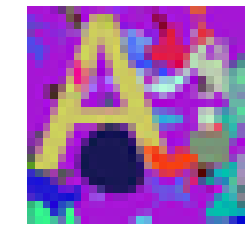

In [8]:
def predict_single_img(img):
    x = np.expand_dims(img, axis=0)  # バッチの次元を追加する。

    # 推論する。
    scores = model.predict(x)[0]
    top3_classes = scores.argsort()[-3:][::-1]

    # 推論結果を表示する。
    for name, score in zip(class_names[top3_classes], scores[top3_classes]):
        print('{}: {:.2%}'.format(name, score))
    print()

img = cv2.imread('data/test/A/A0.png')  # 画像を読み込む。
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR -> RGB
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC) # リサイズする。

# 推論する。
predict_single_img(img)

# 画像を描画する。
plt.axis('off')
plt.imshow(img)
plt.show()

In [13]:
graph = tf.get_default_graph()

In [18]:
model.graph = tf.Graph()

In [19]:
tf.summary.FileWriter('./bb', model.graph)